In [2]:
#import packages
import numpy as np
import pandas as pd 
import requests
import bs4
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier

mpl.rcParams["figure.dpi"] = 300
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt
from matplotlib.colors import ListedColormap

In [5]:
import tqdm
from tqdm import tqdm
import time
import random

# 1. Scraping

In [5]:
#check to see whether can gain results and what they look like
jobs = []

for i in range(0,3):
    r = requests.get('https://uk.indeed.com/jobs?q=data+scientist%20%C2%A330%2C000&l=London&start={}'.format(i))
    soup = BeautifulSoup(r.content, 'html.parser')
    
    for x in soup.find_all('div', attrs={'class': 'job_seen_beacon'}):
            jobs.append(x)
            
    time.sleep(random.randint(7,20))
            
print(jobs)

[<div class="job_seen_beacon"><table cellpadding="0" cellspacing="0" class="jobCard_mainContent" role="presentation"><tbody><tr><td class="resultContent"><div class="heading4 color-text-primary singleLineTitle tapItem-gutter"><h2 class="jobTitle jobTitle-color-purple jobTitle-newJob"><div class="new topLeft holisticNewBlue desktop"><span class="label">new</span></div><span title="Data Scientist">Data Scientist</span></h2></div><div class="heading6 company_location tapItem-gutter"><pre><span class="companyName">Pythia Sports</span><div class="companyLocation">London<!-- --> <!-- -->SW1V 1PZ<span class="remote-bullet">•</span><span>Temporarily Remote</span></div></pre></div><div class="heading6 error-text tapItem-gutter"></div></td></tr></tbody></table><table class="jobCardShelfContainer" role="presentation"><tbody><tr class="jobCardShelf"><td class="shelfItem indeedApply"><span class="iaIcon"></span><span class="ialbl iaTextBlack">Easily apply to this job</span></td><td class="shelfItem

In [6]:
#functions to extract each item - location, company, job and salary. 

In [7]:
r = requests.get('https://uk.indeed.com/jobs?q=data+scientist%20%C2%A330%2C000&l=London&start={}')
soup = BeautifulSoup(r.content, 'html.parser')

In [8]:
def extract_data(soup, np=np):
    
    title = []
    summary = []
    location = []
    company = []
    salary = []
    
    for x in soup.find_all('div', attrs={'class': 'job_seen_beacon'}):
        try:
            title.append(x.find('h2', class_='jobTitle').text)
        except:
            title.append(np.nan)
        try:
            summary.append(x.find('div', class_='job-snippet').text)
        except:
            summary.append(np.nan)
        try:
            location.append(x.find('div', class_='companyLocation').text)
        except:
            location.append(np.nan)
        try:
            salary.append(x.find('div', class_='salary-snippet').text)
        except:
            salary.append(np.nan)
        try:
            company.append(x.find('span', class_='companyName').text)
        except:
            company.append(np.nan)
    return title, summary, location, company, salary

title, summary, location, company, salary = extract_data(soup)

print(title)
print(summary)
print(location)
print(company)
print(salary)
print('End of Data')

['newData Scientist (Cricket)', 'newJunior Data Scientist', 'Data Scientist', 'newData Scientist', 'Junior Data Scientist', 'Data Scientist', 'Data Scientist', 'newData Scientist', 'Data Scientist', 'Data Scientist', 'newData Scientist', 'Data Scientist', 'newProduct Analyst - Data Scientist', 'Data Scientist, Personal Banking', 'Data Scientist']
['\nHave a deep understanding of the data, its limitations and meaning, including the investigation of data validity.\nPrevious experience working with cricket data.\n', '\nIdentify the correct data to be used and explore and select relevant data definitions as fit the requirements.\nExperience coding analyzing data with SQL or SAS.\n', '\nKnowledge of healthcare patient-level data.\nSupporting projects being executed by our offshore India team of skilled data scientists, including discussing…\n', '\nThe ability to collaborate well with other data scientists and machine learning engineers.\nDirectly interact with data scientists in the Financi

Template to crawl Indeed job board. I did this in smaller batches by changing the 'page_index' and only scraped a few cities in one go.

In [61]:
url_template = 'https://uk.indeed.com/jobs?q=data%20scientist%20%C2%A330%2C000&l={}&start={}'
max_results_per_city = 50 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

#create a list of all the information we'll be collecting
title = []
summary = []
location = []
company = []
salary = []

#loop through cities 
for l in set(['Birmingham', 'Bristol', 'Glasgow', 'Edinburgh', 'Manchester', 
    'Leeds', 'Cardiff', 'Nottingham', 'Newcastle', 'Belfast', 
    'Sheffield', 'Southampton', 'London']):
    
    page_index = 0
    
    for start in tqdm(range(0, max_results_per_city, 10)):
        
        page_index +=10

#add information for each job      

        dynamic_url = url_template.format(l, page_index)
        r = requests.get(dynamic_url)
        soup = BeautifulSoup(r.content, 'html.parser')
        
        for x in soup.find_all('div', attrs={'class': 'job_seen_beacon'}):
            try:
                title.append(x.find('h2', class_='jobTitle').text)
            except:
                title.append(np.nan)
            try:
                summary.append(x.find('div', class_='job-snippet').text)
            except:
                summary.append(np.nan)
            try:
                location.append(x.find('div', class_='companyLocation').text)
            except:
                location.append(np.nan)
            try:
                salary.append(x.find('div', class_='salary-snippet').text)
            except:
                salary.append(np.nan)
            try:
                company.append(x.find('span', class_='companyName').text)
            except:
                company.append(np.nan)

        
        time.sleep(random.randint(7,20))

100%|██████████| 5/5 [00:56<00:00, 11.31s/it]


In [62]:
#create the results as a list
results = [title, company, salary, location, summary]

In [63]:
#put the list info in a dictionary
clean = {}
title = ['title', 'company', 'salary', 'location', 'summary']

for index, items in enumerate(results):
    i = title[index]
    clean[i] = []
    for elements in items:
        try:
            clean[i].append(elements)
        except:
            clean[i].append(None)

In [64]:
#create a dataframe of the dictionary
data1 = pd.DataFrame(clean)

In [65]:
#see what the dataframe looks like
data1.head()

,title,company,salary,location,summary
0,Data Scientist,ROSEN Group,NaN,Newcastle upon Tyne,\nPreparation of data pipelines using Python a...
1,newSenior Data Scientist,Sage,NaN,Newcastle upon Tyne,\nKey Responsibilities  Develop and own the d...
2,newDirector - Data Science,Sage,NaN,Newcastle upon Tyne,\n Focused on providing direction and insight...
3,RapidMiner Data Scientist,Lucid,NaN,United Kingdom•Remote,\nApply all phases of the data science process...
4,Data Scientist,Nigel Wright Group,"£50,000 a year",Tyne and Wear•Remote,\nConduct exploratory data analysis on new dat...


In [66]:
#create a CSV file of the data
data1.to_csv('data1.csv')

# 2. Data Cleaning

### Getting scraped data into one place

In [20]:
data1 = pd.read_csv("data_scientist.csv", index_col=[0])
data2 = pd.read_csv("data_scientist1.csv", index_col=[0])
data3 = pd.read_csv("data_scientist4.csv", index_col=[0])
data4 = pd.read_csv("data_scientist5.csv")
data5 = pd.read_csv("data_scientist6.csv", index_col=[0])
data6 = pd.read_csv("data_scientist7.csv")
data7 = pd.read_csv("data_scientist8.csv")
data8 = pd.read_csv("analyst.csv")
data9 = pd.read_csv("analyst1.csv")
data10 = pd.read_csv("analyst2.csv")
data11 = pd.read_csv("analyst3.csv")
data12 = pd.read_csv("analyst4.csv")

In [21]:
data = data1.append(data2)

In [22]:
data = data.append(data3)

In [23]:
data = data.append(data4)

In [24]:
data = data.append(data5)

In [25]:
data = data.append(data6)

In [26]:
data = data.append(data7)

In [27]:
data = data.append(data8)

In [28]:
data = data.append(data9)

In [29]:
data = data.append(data10)

In [30]:
data = data.append(data11)

In [31]:
data = data.append(data12)

In [32]:
#see what the data looks like
data

,title,company,salary,location,summary
0,Lead Data Scientist (Technical Lead and Team L...,Home Office,"£52,051 - £63,175 a year",Sheffield,\nIdeally you will have a background in workin...
1,newData Scientist,Lumilinks,"£30,000 - £45,000 a year",United Kingdom•Remote,\nThe science team at Lumilinks is led by Dr. ...
2,Text Analyst / Data Scientist,Health & Safety Executive,"£39,334 - £45,865 a year",Buxton•Remote,"\nPrevious experience as a text analyst, data ..."
3,Research Associate in Developing Data-Analytic...,University of Sheffield,"£32,344 - £40,927 a year",Sheffield,\nInsight from data generated in experiments a...
4,Research Associate in Machine Learning for Med...,University of Sheffield,"£32,344 - £40,927 a year",Sheffield,\nLearning software tool on our large-scale ca...
...,...,...,...,...,...
655,newBI Developer,Robert Half,"£50,000 - £60,000 a year",England,\nLead processes on ingesting raw data from a ...
656,Finance Analyst,Walters People,NaN,Burton-On-Trent,\nStrong experience in financial modelling and...
657,RV Risk Analyst,"Toyota Financial Services, KINTO and KINTO JOIN",NaN,Heath,\nPrepare data for the quarterly Residual Valu...
658,Power BI Developer,No.7 Boots,NaN,Nottingham,\nSupport maintenance of live infrastructure f...


In [33]:
#get rid of duplicate rows
data = data.drop_duplicates()

In [34]:
#take out salaries that are not a number
data = data[data['salary'].notna()]

In [35]:
#review the data
data.head()

,title,company,salary,location,summary
0,Lead Data Scientist (Technical Lead and Team L...,Home Office,"£52,051 - £63,175 a year",Sheffield,\nIdeally you will have a background in workin...
1,newData Scientist,Lumilinks,"£30,000 - £45,000 a year",United Kingdom•Remote,\nThe science team at Lumilinks is led by Dr. ...
2,Text Analyst / Data Scientist,Health & Safety Executive,"£39,334 - £45,865 a year",Buxton•Remote,"\nPrevious experience as a text analyst, data ..."
3,Research Associate in Developing Data-Analytic...,University of Sheffield,"£32,344 - £40,927 a year",Sheffield,\nInsight from data generated in experiments a...
4,Research Associate in Machine Learning for Med...,University of Sheffield,"£32,344 - £40,927 a year",Sheffield,\nLearning software tool on our large-scale ca...


In [36]:
#make data look slightly more presentable
# Remove special characters in every text in summary
specialchar = ["\n"]
for c in specialchar:
    data["summary"] = data["summary"].map(lambda x: x.replace(c, "").lower())

In [37]:
# Remove 'new' in every text in title
specialchar = ["new"]
for c in specialchar:
    data["title"] = data["title"].map(lambda x: x.replace(c, "").lower())

### 1.1 Clean the salary column

In [38]:
#discover what the salary column looks like before cleaning
data.salary.unique()

array(['£52,051 - £63,175 a year', '£30,000 - £45,000 a year',
       '£39,334 - £45,865 a year', '£32,344 - £40,927 a year',
       '£30,000 a year', '£40,000 - £50,000 a year',
       '£55,000 - £55,001 a year', '£30,000 - £40,000 a year',
       '£33,696 a year', '£44,400 - £56,000 a year', '£41,200 a year',
       '£17.28 an hour', '£21.13 an hour', '£60,000 - £85,000 a year',
       '£55,000 - £60,000 a year', '£51,000 - £62,000 a year',
       '£16.14 - £19.69 an hour', '£36,382 - £40,927 a year',
       '£40,001 - £60,000 a year', '£29,214 - £64,207 a year',
       '£53,348 - £60,022 a year', '£50,000 a year',
       '£45,000 - £55,000 a year', '£34,304 - £50,296 a year',
       '£25,627 - £39,739 a year', '£30,000 - £35,000 a year',
       '£55,000 - £65,000 a year', '£32,000 a year',
       '£50,000 - £75,000 a year', '£450 - £540 a day',
       '£44,706 - £50,296 a year', '£38,587 - £43,434 a year',
       '£34,304 - £38,587 a year', '£60,000 - £70,000 a year',
       '£45,00

In [39]:
#remove salary figures with 'a day', 'a week', 'a month' or 'an hour' in them

In [40]:
new_data = data[data['salary'].str.contains('a day', regex=False, case=False, na=False)]


In [41]:
new_data1 = data[data['salary'].str.contains('an hour', regex=False, case=False, na=False)]

In [42]:
new_data2 = data[data['salary'].str.contains('a week', regex=False, case=False, na=False)]

In [43]:
new_data3 = data[data['salary'].str.contains('a month', regex=False, case=False, na=False)]

In [44]:
#put the new dataframes back together
data = pd.concat([data, new_data, new_data1, new_data2, new_data3]).drop_duplicates(keep=False)

In [45]:
#check to see what data is looking like now. 
data.head()

,title,company,salary,location,summary
0,lead data scientist (technical lead and team l...,Home Office,"£52,051 - £63,175 a year",Sheffield,ideally you will have a background in working ...
1,data scientist,Lumilinks,"£30,000 - £45,000 a year",United Kingdom•Remote,the science team at lumilinks is led by dr. ti...
2,text analyst / data scientist,Health & Safety Executive,"£39,334 - £45,865 a year",Buxton•Remote,"previous experience as a text analyst, data sc..."
3,research associate in developing data-analytic...,University of Sheffield,"£32,344 - £40,927 a year",Sheffield,insight from data generated in experiments and...
4,research associate in machine learning for med...,University of Sheffield,"£32,344 - £40,927 a year",Sheffield,learning software tool on our large-scale card...


In [46]:
data.shape

(1246, 5)

In [47]:
#with the rest of the data, take out the 'a year' from the salary column
specialchar = [" a year"]
for c in specialchar:
    data["salary"] = data["salary"].map(lambda x: x.replace(c, "").lower())

In [48]:
#split the salary into two columns
salary_high_low = data['salary'].str.split('-', 1, expand=True)

In [49]:
#put two salaries into own dataframe
salary_high_low = salary_high_low.set_axis(['min_salary', 'max_salary'], axis=1, inplace=False)
salary_high_low

,min_salary,max_salary
0,"£52,051","£63,175"
1,"£30,000","£45,000"
2,"£39,334","£45,865"
3,"£32,344","£40,927"
4,"£32,344","£40,927"
...,...,...
560,"£45,000",None
562,"£25,000","£27,000"
569,"£25,000",None
570,"£32,000",None


In [50]:
#replace the '£' and ',' so we are left with numbers in the columns. 
salary_high_low['min_salary'] = salary_high_low['min_salary'].map(lambda x : str(x).replace('£',''))
salary_high_low['max_salary'] = salary_high_low['max_salary'].map(lambda x : str(x).replace('£',''))
salary_high_low['min_salary'] = salary_high_low['min_salary'].map(lambda x : str(x).replace(',',''))
salary_high_low['max_salary'] = salary_high_low['max_salary'].map(lambda x : str(x).replace(',',''))

In [51]:
#check that only numbers are left in the min salary column
salary_high_low.min_salary.unique()

array(['52051 ', '30000 ', '39334 ', '32344 ', '30000', '40000 ',
       '55000 ', '33696', '44400 ', '41200', '60000 ', '51000 ', '36382 ',
       '40001 ', '29214 ', '53348 ', '50000', '45000 ', '34304 ',
       '25627 ', '32000', '50000 ', '44706 ', '38587 ', '36498 ',
       '32300 ', '25052 ', '85000 ', '65000', '33309 ', '40927 ',
       '42149 ', '65573 ', '34000 ', '43000 ', '35000 ', '65000 ',
       '100000', '49549 ', 'up to 100000', 'from 43250', '32000 ',
       '100000 ', '45900 ', '80001 ', '61100 ', '80000 ', '85000',
       '38000 ', '40611 ', '70000 ', '90000 ', '61227', '52500 ',
       '46934 ', '75000 ', '60000', '120000', '32557 ', '55000',
       'from 90000', '95000 ', '33000', '77000 ', '30600', '34304',
       '31406 ', '57900', '33309', '32817', '125000 ', '60001 ', '45234 ',
       '110000 ', '75000', '130000', '110000', '150000', '90000',
       '120000 ', 'up to 70000', '38607 ', 'from 30659', '62000 ',
       '28588 ', 'from 30596', '70001 ', '40000', '20

In [52]:
#check that only numbers are left in the max salary column
salary_high_low.max_salary.unique()

array([' 63175', ' 45000', ' 45865', ' 40927', 'None', ' 50000', ' 55001',
       ' 40000', ' 56000', ' 85000', ' 60000', ' 62000', ' 64207',
       ' 60022', ' 55000', ' 50296', ' 39739', ' 35000', ' 65000',
       ' 75000', ' 43434', ' 38587', ' 70000', ' 40297', ' 38000',
       ' 80000', ' 54683', ' 100000', ' 90000', ' 106482', ' 42000',
       ' 43000', ' 68000', ' 69557', ' 63200', ' 120000', ' 59400',
       ' 82800', ' 110000', ' 46119', ' 115000', ' 95000', ' 61000',
       ' 130000', ' 55299', ' 35888', ' 125000', ' 36000', ' 150000',
       ' 140000', ' 53536', ' 39372', ' 35612', ' 30000', ' 27000',
       ' 52022', ' 27500', ' 36382', ' 34300', ' 23000', ' 31000',
       ' 34000', ' 26000', ' 37000', ' 38588', ' 51848', ' 72000',
       ' 36377', ' 24884', ' 28000', ' 39246', ' 47950', ' 22000',
       ' 45594', ' 60316', ' 57500', ' 46124', ' 43361', ' 14000',
       ' 90387', ' 30600', ' 33000', ' 51996', ' 44700', ' 25000',
       ' 46000', ' 40500', ' 58000', ' 64583'

In [53]:
#there are a few 'from' and 'up to' so replce these with nothing as well
salary_high_low['min_salary'] = salary_high_low['min_salary'].map(lambda x : str(x).replace('from ',''))
salary_high_low['max_salary'] = salary_high_low['max_salary'].map(lambda x : str(x).replace('up to ',''))
salary_high_low['max_salary'] = salary_high_low['max_salary'].map(lambda x : str(x).replace('from ',''))
salary_high_low['min_salary'] = salary_high_low['min_salary'].map(lambda x : str(x).replace('up to ',''))

In [54]:
#recheck min and max salary columns
salary_high_low.max_salary.unique()

array([' 63175', ' 45000', ' 45865', ' 40927', 'None', ' 50000', ' 55001',
       ' 40000', ' 56000', ' 85000', ' 60000', ' 62000', ' 64207',
       ' 60022', ' 55000', ' 50296', ' 39739', ' 35000', ' 65000',
       ' 75000', ' 43434', ' 38587', ' 70000', ' 40297', ' 38000',
       ' 80000', ' 54683', ' 100000', ' 90000', ' 106482', ' 42000',
       ' 43000', ' 68000', ' 69557', ' 63200', ' 120000', ' 59400',
       ' 82800', ' 110000', ' 46119', ' 115000', ' 95000', ' 61000',
       ' 130000', ' 55299', ' 35888', ' 125000', ' 36000', ' 150000',
       ' 140000', ' 53536', ' 39372', ' 35612', ' 30000', ' 27000',
       ' 52022', ' 27500', ' 36382', ' 34300', ' 23000', ' 31000',
       ' 34000', ' 26000', ' 37000', ' 38588', ' 51848', ' 72000',
       ' 36377', ' 24884', ' 28000', ' 39246', ' 47950', ' 22000',
       ' 45594', ' 60316', ' 57500', ' 46124', ' 43361', ' 14000',
       ' 90387', ' 30600', ' 33000', ' 51996', ' 44700', ' 25000',
       ' 46000', ' 40500', ' 58000', ' 64583'

In [55]:
salary_high_low.min_salary.unique()

array(['52051 ', '30000 ', '39334 ', '32344 ', '30000', '40000 ',
       '55000 ', '33696', '44400 ', '41200', '60000 ', '51000 ', '36382 ',
       '40001 ', '29214 ', '53348 ', '50000', '45000 ', '34304 ',
       '25627 ', '32000', '50000 ', '44706 ', '38587 ', '36498 ',
       '32300 ', '25052 ', '85000 ', '65000', '33309 ', '40927 ',
       '42149 ', '65573 ', '34000 ', '43000 ', '35000 ', '65000 ',
       '100000', '49549 ', '43250', '32000 ', '100000 ', '45900 ',
       '80001 ', '61100 ', '80000 ', '85000', '38000 ', '40611 ',
       '70000 ', '90000 ', '61227', '52500 ', '46934 ', '75000 ', '60000',
       '120000', '32557 ', '55000', '90000', '95000 ', '33000', '77000 ',
       '30600', '34304', '31406 ', '57900', '33309', '32817', '125000 ',
       '60001 ', '45234 ', '110000 ', '75000', '130000', '110000',
       '150000', '120000 ', '70000', '38607 ', '30659', '62000 ',
       '28588 ', '30596', '70001 ', '40000', '20301 ', '27000 ', '28000 ',
       '25000 ', '36000 ', '450

In [56]:
#check the salary_low_high dataframe
salary_high_low

,min_salary,max_salary
0,52051,63175
1,30000,45000
2,39334,45865
3,32344,40927
4,32344,40927
...,...,...
560,45000,None
562,25000,27000
569,25000,None
570,32000,None


In [57]:
#check the type of the min and max salary in the dataframe
salary_high_low.dtypes

min_salary    object
max_salary    object
dtype: object

In [58]:
#replace 'None' value in the max salary with the same value in the min salary
salary_high_low['max_salary'] = salary_high_low.apply(lambda row: row['min_salary'] if row['max_salary']=='None' else row['max_salary'], axis=1)

In [59]:
#check this has worked
salary_high_low

,min_salary,max_salary
0,52051,63175
1,30000,45000
2,39334,45865
3,32344,40927
4,32344,40927
...,...,...
560,45000,45000
562,25000,27000
569,25000,25000
570,32000,32000


In [60]:
#we can now convert the data to a float so we can do more calculations
salary_high_low["min_salary"] = salary_high_low["min_salary"].astype(str).astype(float)
salary_high_low["max_salary"] = salary_high_low["max_salary"].astype(str).astype(float)

In [61]:
# and find out the mean salary of the two columns
salary_high_low['mean_salary'] = salary_high_low[['min_salary','max_salary']].mean(axis=1)

In [62]:
#check dataframe
salary_high_low

,min_salary,max_salary,mean_salary
0,52051.0,63175.0,57613.0
1,30000.0,45000.0,37500.0
2,39334.0,45865.0,42599.5
3,32344.0,40927.0,36635.5
4,32344.0,40927.0,36635.5
...,...,...,...
560,45000.0,45000.0,45000.0
562,25000.0,27000.0,26000.0
569,25000.0,25000.0,25000.0
570,32000.0,32000.0,32000.0


In [63]:
#drop min and max salary columns so we are just left with the mean salary
salary_high_low = salary_high_low.drop(['min_salary'], axis = 1)
salary_high_low = salary_high_low.drop(['max_salary'], axis = 1)
salary_high_low

,mean_salary
0,57613.0
1,37500.0
2,42599.5
3,36635.5
4,36635.5
...,...
560,45000.0
562,26000.0
569,25000.0
570,32000.0


In [64]:
#add the new salary information to the previous dataframe
data = pd.concat([data, salary_high_low], axis=1)

In [65]:
#drop the salary column
data = data.drop(['salary'], axis = 1)

In [66]:
#check the data
data.head()

,title,company,location,summary,mean_salary
0,lead data scientist (technical lead and team l...,Home Office,Sheffield,ideally you will have a background in working ...,57613.0
1,data scientist,Lumilinks,United Kingdom•Remote,the science team at lumilinks is led by dr. ti...,37500.0
2,text analyst / data scientist,Health & Safety Executive,Buxton•Remote,"previous experience as a text analyst, data sc...",42599.5
3,research associate in developing data-analytic...,University of Sheffield,Sheffield,insight from data generated in experiments and...,36635.5
4,research associate in machine learning for med...,University of Sheffield,Sheffield,learning software tool on our large-scale card...,36635.5


### 1.2 Clean the location column

In [67]:
#check the locations
data.location.unique()

array(['Sheffield', 'United Kingdom•Remote', 'Buxton•Remote',
       'Sheffield•Remote', 'Sheffield S1 2BJ', 'Huddersfield',
       'Leamington Spa', 'Warwick CV34 6DA', 'Atherstone CV9 2SQ',
       'Birmingham', 'Coventry+1 location', 'Glasgow', 'Stirling•Remote',
       'Glasgow G40 2QW•Temporarily Remote', 'Tyne and Wear•Remote',
       'Newcastle upon Tyne+3 locations', 'Newcastle upon Tyne',
       'Newcastle upon Tyne•Remote', 'Durham', 'Derby', 'Nottingham',
       'Nottingham•Remote', 'Newport NP10 8FZ', 'Cardiff',
       'Bristol BS8 1QU', 'Bristol', 'Bath•Remote', 'South West',
       'Porton Down', 'Salisbury•Remote', 'Bournemouth', 'Hampshire',
       'Edinburgh', 'Edinburgh EH3 9QG•Remote', 'Belfast BT7 1NN',
       'Belfast', 'Belfast•Remote', 'Birmingham•Remote',
       'Manchester M13 9PL', 'Manchester', 'Manchester•Remote',
       'Wilmslow', 'London', 'London WC2H•Remote',
       'London•Temporarily Remote', 'London W1B 5AN',
       'Hemel Hempstead HP2 7AH', 'Abbey W

In [68]:
#we need to make sure that we can search for our specified list of cities, so we need to manually change some towns and cities to their nearest neighbour. 

In [69]:
data = data.replace(to_replace ='[Hh]enley', value = 'Birmingham', regex = True)
data = data.replace(to_replace ='[bB]uxton', value = 'Sheffield', regex = True)
data = data.replace(to_replace ='[hH]uddersfield', value = 'Leeds', regex = True)
data = data.replace(to_replace ='[Ll]eamington', value = 'Birmingham', regex = True)
data = data.replace(to_replace ='[Ww]arwick', value = 'Birmingham', regex = True)
data = data.replace(to_replace ='[Ss]tirling', value = 'Glasgow', regex = True)
data = data.replace(to_replace ='[Tt]yne', value = 'Newcastle', regex = True)
data = data.replace(to_replace ='[Dd]urham', value = 'Newcastle', regex = True)
data = data.replace(to_replace ='[Dd]erby', value = 'Nottingham', regex = True)
data = data.replace(to_replace ='[Nn]ewport', value = 'Cardiff', regex = True)
data = data.replace(to_replace ='[Bb]ath', value = 'Bristol', regex = True)
data = data.replace(to_replace ='South West', value = 'Bristol', regex = True)
data = data.replace(to_replace ='Porton Down', value = 'Bristol', regex = True)
data = data.replace(to_replace ='[Ss]alisbury', value = 'Southampton', regex = True)
data = data.replace(to_replace ='[Bb]ournemouth', value = 'Southampton', regex = True)
data = data.replace(to_replace ='[Hh]ampshire', value = 'Southampton', regex = True)
data = data.replace(to_replace ='[Mm]orley', value = 'Leeds', regex = True)
data = data.replace(to_replace ='[Ss]utton', value = 'London', regex = True)
data = data.replace(to_replace ='[Ee]nfield', value = 'London', regex = True)
data = data.replace(to_replace ='[Bb]rentford', value = 'London', regex = True)
data = data.replace(to_replace ='[Kk]ensington', value = 'London', regex = True)
data = data.replace(to_replace ='[Ww]ilmslow', value = 'Manchester', regex = True)
data = data.replace(to_replace ='[Pp]ortsmouth', value = 'Southampton', regex = True)
data = data.replace(to_replace ='[Aa]therstone', value = 'Birmingham', regex = True)
data = data.replace(to_replace ='Hemel Hempstead', value = 'London', regex = True)
data = data.replace(to_replace ='Abbey Wood', value = 'London', regex = True)
data = data.replace(to_replace ='New Haw', value = 'London', regex = True)
data = data.replace(to_replace ='[Dd]artford', value = 'London', regex = True)
data = data.replace(to_replace ='[Tt]wickenham', value = 'London', regex = True)
data = data.replace(to_replace ='[Yy]ork', value = 'Leeds', regex = True)
data = data.replace(to_replace ='[Bb]rentford', value = 'London', regex = True)
data = data.replace(to_replace ='[Vv]auxhall', value = 'London', regex = True)
data = data.replace(to_replace ='[Ss]utton', value = 'London', regex = True)
data = data.replace(to_replace ='[Ss]urrey', value = 'London', regex = True)
data = data.replace(to_replace ='[Hh]ackney', value = 'London', regex = True)
data = data.replace(to_replace ='[Vv]ictoria', value = 'London', regex = True)
data = data.replace(to_replace ='West Ham', value = 'London', regex = True)
data = data.replace(to_replace ='Elephant & Castle', value = 'London', regex = True)
data = data.replace(to_replace ='West Drayton', value = 'London', regex = True)
data = data.replace(to_replace ='[Rr]eigate', value = 'London', regex = True)
data = data.replace(to_replace ='[Uu]xbridge', value = 'London', regex = True)
data = data.replace(to_replace ='[Ww]estminster', value = 'London', regex = True)
data = data.replace(to_replace ='[Ss]lough', value = 'London', regex = True)
data = data.replace(to_replace ='[Ww]esterham', value = 'London', regex = True)
data = data.replace(to_replace ='[Hh]ounslow', value = 'London', regex = True)
data = data.replace(to_replace ='[Cc]ross', value = 'London', regex = True)
data = data.replace(to_replace ='[Cc]olingdale', value = 'London', regex = True)
data = data.replace(to_replace ='Henley in Arden', value = 'Birmingham', regex = True)
data = data.replace(to_replace ='[Rr]ugeley', value = 'Birmingham', regex = True)
data = data.replace(to_replace ='[Bb]romich', value = 'Birmingham', regex = True)
data = data.replace(to_replace ='[Ww]olverhampton', value = 'Birmingham', regex = True)
data = data.replace(to_replace ='[Ss]tourbridge', value = 'Birmingham', regex = True)
data = data.replace(to_replace ='Cannock Chase', value = 'Birmingham', regex = True)
data = data.replace(to_replace ='[Ll]ongbridge', value = 'Birmingham', regex = True)
data = data.replace(to_replace ='[Bb]lackburn', value = 'Manchester', regex = True)
data = data.replace(to_replace ='[Bb]olton', value = 'Manchester', regex = True)
data = data.replace(to_replace ='[Ss]alford', value = 'Manchester', regex = True)
data = data.replace(to_replace ='[Ss]tockport', value = 'Manchester', regex = True)
data = data.replace(to_replace ='[Hh]ampshire', value = 'Southampton', regex = True)
data = data.replace(to_replace ='[Ee]lland', value = 'Leeds', regex = True)
data = data.replace(to_replace ='[Ww]ythenshawe', value = 'Manchester', regex = True)
data = data.replace(to_replace ='[Ww]arrington', value = 'Manchester', regex = True)
data = data.replace(to_replace ='[Ww]insford', value = 'Manchester', regex = True)
data = data.replace(to_replace ='[Bb]ury', value = 'Manchester', regex = True)
data = data.replace(to_replace ='[Hh]elens', value = 'Liverpool', regex = True)
data = data.replace(to_replace ='[Cc]hadderton', value = 'Manchester', regex = True)
data = data.replace(to_replace ='[Tt]ameside', value = 'Manchester', regex = True)
data = data.replace(to_replace ='[Ii]rlam', value = 'Manchester', regex = True)
data = data.replace(to_replace ='[Cc]horley', value = 'Manchester', regex = True)
data = data.replace(to_replace ='North West', value = 'Manchester', regex = True)
data = data.replace(to_replace ='[Bb]irchwood', value = 'London', regex = True)
data = data.replace(to_replace ='[Aa]ltricham', value = 'Manchester', regex = True)
data = data.replace(to_replace ='Heald Green', value = 'Manchester', regex = True)
data = data.replace(to_replace ='[Rr]ochdale', value = 'Manchester', regex = True)
data = data.replace(to_replace ='[Hh]alifax', value = 'Leeds', regex = True)
data = data.replace(to_replace ='[Bb]radford', value = 'Leeds', regex = True)
data = data.replace(to_replace ='[Kk]naresborough', value = 'Leeds', regex = True)
data = data.replace(to_replace ='[Rr]ichmond', value = 'London', regex = True)
data = data.replace(to_replace ='[Bb]rentwood', value = 'London', regex = True)
data = data.replace(to_replace ='[Nn]ewham', value = 'London', regex = True)
data = data.replace(to_replace ='[Hh]arlow', value = 'London', regex = True)
data = data.replace(to_replace ='[Ww]indsor', value = 'London', regex = True)
data = data.replace(to_replace ='[Ll]ambeth', value = 'London', regex = True)
data = data.replace(to_replace ='[Ww]atford', value = 'London', regex = True)
data = data.replace(to_replace ='[Cc]roydon', value = 'London', regex = True)
data = data.replace(to_replace ='[Kk]ingston', value = 'London', regex = True)
data = data.replace(to_replace ='[Aa]lbans', value = 'London', regex = True)
data = data.replace(to_replace ='[Bb]ellshill', value = 'Glasgow', regex = True)
data = data.replace(to_replace ='[Mm]otherwell', value = 'Glasgow', regex = True)
data = data.replace(to_replace ='[Ww]rington', value = 'Bristol', regex = True)
data = data.replace(to_replace ='[Nn]ewport', value = 'Cardiff', regex = True)
data = data.replace(to_replace ='[Cc]orsham', value = 'Bristol', regex = True)
data = data.replace(to_replace ='[Cc]hippenham', value = 'Bristol', regex = True)
data = data.replace(to_replace ='[Cc]wbran', value = 'Cardiff', regex = True)
data = data.replace(to_replace ='[Aa]ltricham', value = 'Manchester', regex = True)
data = data.replace(to_replace ='[Ww]eston', value = 'Bristol', regex = True)
data = data.replace(to_replace ='[Ww]orcester', value = 'Birmingham', regex = True)
data = data.replace(to_replace ='[Ww]alsall', value = 'Birmingham', regex = True)
data = data.replace(to_replace ='[Kk]enilworth', value = 'Birmingham', regex = True)
data = data.replace(to_replace ='[Tt]amworth', value = 'Leeds', regex = True)
data = data.replace(to_replace ='[Ww]olverhampton', value = 'Birmingham', regex = True)
data = data.replace(to_replace ='[Dd]roitwich', value = 'Birmingham', regex = True)
data = data.replace(to_replace ='[Mm]idlands', value = 'Birmingham', regex = True)
data = data.replace(to_replace ='[Aa]von', value = 'Birmingham', regex = True)
data = data.replace(to_replace ='[Ss]olihull', value = 'Birmingham', regex = True)
data = data.replace(to_replace ='[Cc]annock', value = 'Birmingham', regex = True)
data = data.replace(to_replace ='[Oo]lbury', value = 'Birmingham', regex = True)
data = data.replace(to_replace ='[Ww]akefield', value = 'Leeds', regex = True)
data = data.replace(to_replace ='[Ss]elby', value = 'Leeds', regex = True)
data = data.replace(to_replace ='[Bb]arnsley', value = 'Leeds', regex = True)
data = data.replace(to_replace ='[Bb]radford', value = 'Leeds', regex = True)
data = data.replace(to_replace ='[Rr]otherham', value = 'Sheffield', regex = True)
data = data.replace(to_replace ='[Ss]kipton', value = 'Leeds', regex = True)
data = data.replace(to_replace ='[Ff]areham', value = 'Southampton', regex = True)
data = data.replace(to_replace ='[Ww]imbourne', value = 'Southampton', regex = True)
data = data.replace(to_replace ='[Ww]inchester', value = 'Southampton', regex = True)
data = data.replace(to_replace ='[Ee]astleigh', value = 'Southampton', regex = True)
data = data.replace(to_replace ='[Jj]ordanstown', value = 'Belfast', regex = True)
data = data.replace(to_replace ='[Gg]ateshead', value = 'Newcastle', regex = True)
data = data.replace(to_replace ='[Ss]eaham', value = 'Newcastle', regex = True)
data = data.replace(to_replace ='[Ss]underland', value = 'Newcastle', regex = True)
data = data.replace(to_replace ='[Pp]ontypool', value = 'Cardiff', regex = True)
data = data.replace(to_replace ='[Ll]eicester', value = 'Nottingham', regex = True)
data = data.replace(to_replace ='[Bb]urton', value = 'Nottingham', regex = True)

In [70]:
#recheck the locations
data.location.unique()

array(['Sheffield', 'United Kingdom•Remote', 'Sheffield•Remote',
       'Sheffield S1 2BJ', 'Leeds', 'Birmingham Spa',
       'Birmingham CV34 6DA', 'Birmingham CV9 2SQ', 'Birmingham',
       'Coventry+1 location', 'Glasgow', 'Glasgow•Remote',
       'Glasgow G40 2QW•Temporarily Remote', 'Newcastle and Wear•Remote',
       'Newcastle upon Newcastle+3 locations', 'Newcastle upon Newcastle',
       'Newcastle upon Newcastle•Remote', 'Newcastle', 'Nottingham',
       'Nottingham•Remote', 'Cardiff NP10 8FZ', 'Cardiff',
       'Bristol BS8 1QU', 'Bristol', 'Bristol•Remote',
       'Southampton•Remote', 'Southampton', 'Edinburgh',
       'Edinburgh EH3 9QG•Remote', 'Belfast BT7 1NN', 'Belfast',
       'Belfast•Remote', 'Birmingham•Remote', 'Manchester M13 9PL',
       'Manchester', 'Manchester•Remote', 'London', 'London WC2H•Remote',
       'London•Temporarily Remote', 'London W1B 5AN', 'London HP2 7AH',
       'London•Remote', 'Greater London', 'Leeds•Remote',
       'University of Leeds', 

# 2. EDA

In [71]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [72]:
#have a look at the top words used in the summary column without sopt words. 
vect = CountVectorizer(stop_words='english', min_df=10, ngram_range=(1,2))
vect.fit(data['summary'])

print('# of features: {}'.format(len(vect.get_feature_names()) ))

# of features: 456


In [73]:
responsibility = vect.get_feature_names()
responsibility

['000',
 'ability',
 'ability analyse',
 'able',
 'access',
 'accuracy',
 'accurate',
 'actionable',
 'ad',
 'ad hoc',
 'advanced',
 'ai',
 'algorithms',
 'alondon',
 'analyse',
 'analyse data',
 'analyse interpret',
 'analysing',
 'analysing data',
 'analysis',
 'analysis data',
 'analysis skills',
 'analyst',
 'analyst data',
 'analysts',
 'analytical',
 'analytical skills',
 'analytics',
 'analytics data',
 'apply',
 'applying',
 'appropriate',
 'architecture',
 'areas',
 'artificial',
 'artificial intelligence',
 'aspects',
 'assist',
 'azure',
 'background',
 'based',
 'benefits',
 'best',
 'bi',
 'big',
 'big data',
 'bonus',
 'bring',
 'build',
 'building',
 'building data',
 'business',
 'business analyst',
 'business intelligence',
 'candidate',
 'capabilities',
 'capture',
 'carry',
 'clean',
 'cleansing',
 'client',
 'clients',
 'closely',
 'cloud',
 'collect',
 'collection',
 'commercial',
 'communication',
 'company',
 'complex',
 'complex data',
 'computer',
 'computer sc

In [74]:
req = pd.DataFrame(vect.transform(data['summary']).todense(),
                       columns=responsibility)

In [75]:
#discover which are the most popular in the summar column. 
#didn't actually use this information in the modelling. 
responsibility_count = req.sum(axis=0)
responsibility_count.sort_values(ascending = False).head(20)

data             1929
experience        331
analysis          254
business          226
analyst           164
working           151
using             150
science           136
team              136
data analysis     132
role              120
data science      119
support           107
management         99
work               99
skills             97
reporting          91
understanding      85
strong             84
analytics          83
dtype: int64

In [76]:
top_responsibility = responsibility_count.sort_values(ascending = False).head(20)

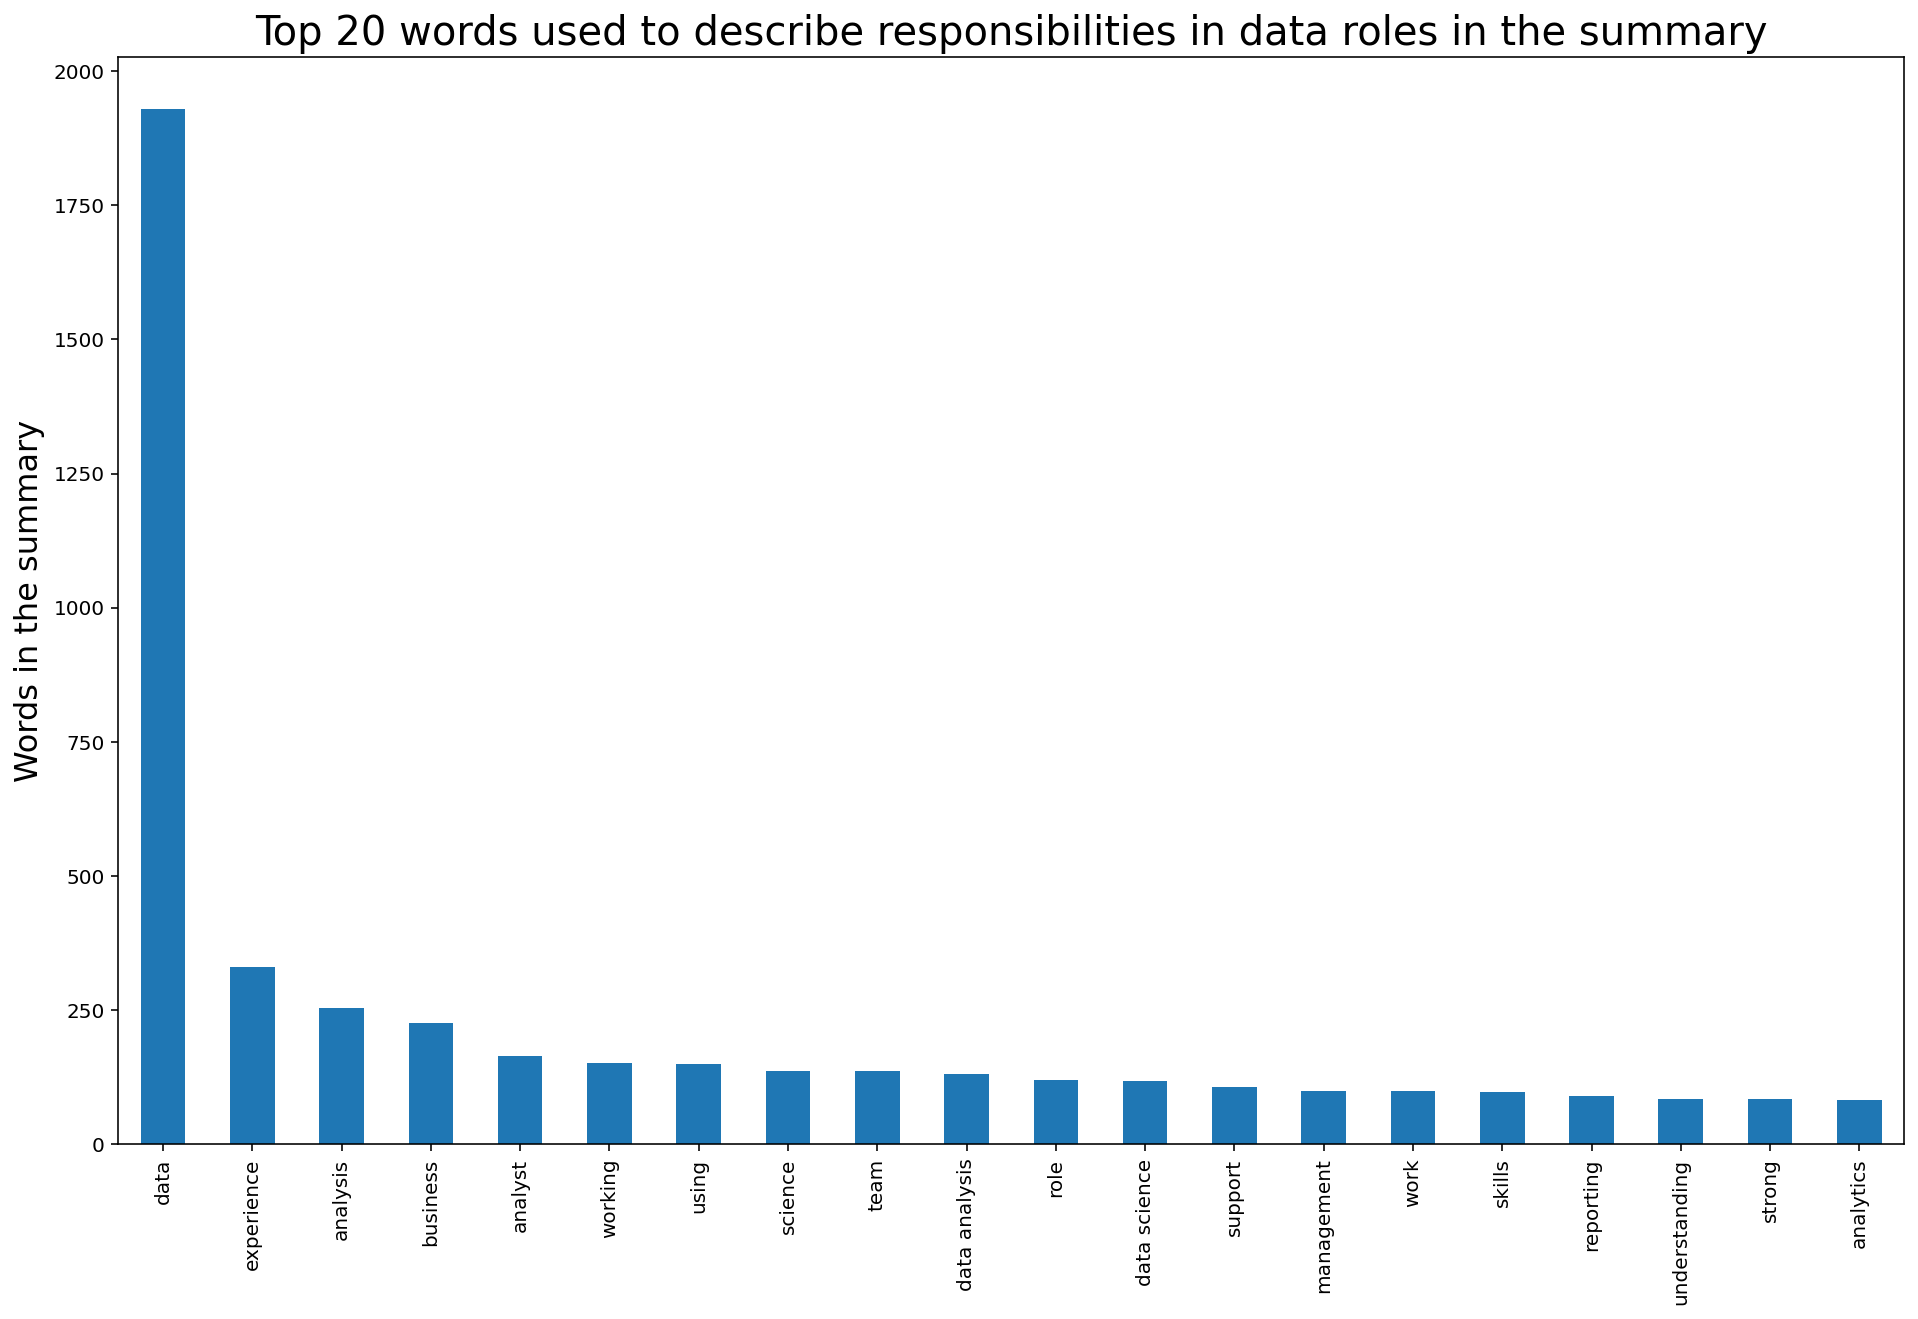

In [77]:
#plot the top responsibilities. 
top_responsibility.plot(kind="bar", figsize=(16, 10))
plt.title('Top 20 words used to describe responsibilities in data roles in the summary', fontsize=20)
plt.ylabel('Frequency of top words', fontsize=16)
plt.ylabel('Words in the summary', fontsize=16)
plt.show()

In [78]:
# convert data to csv for second stage of analysis

In [79]:
data.to_csv('data.csv')